In [44]:
%matplotlib inline
#주피터노트북에서 라인 아래에 보여지도록 설정

%config InlineBackend.figure_formats = {'png','retina'} 
#png 이미지 압축기술설정, retina 그래프 해상도 2배 높히기

#그래프 한글폰트 설정
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
#음수처리
mpl.rcParams['axes.unicode_minus'] = False

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [4]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [5]:
from nltk.corpus import movie_reviews
sentences = [list(s) for s in movie_reviews.sents()]

In [6]:
sentences[0]

['plot',
 ':',
 'two',
 'teen',
 'couples',
 'go',
 'to',
 'a',
 'church',
 'party',
 ',',
 'drink',
 'and',
 'then',
 'drive',
 '.']

In [10]:
from gensim.models.word2vec import Word2Vec

In [11]:
%%time
model = Word2Vec(sentences)

Wall time: 8.55 s


In [12]:
model.init_sims(replace=True)

In [13]:
model.similarity('actor', 'actress')

C:\Users\creal\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.8748676882984634

In [14]:
model.similarity('he', 'she')

C:\Users\creal\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.86552308552803714

In [15]:
model.similarity('actor', 'she')

C:\Users\creal\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.23966955066886436

In [16]:
model.most_similar("villain")

C:\Users\creal\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('actress', 0.8385087847709656),
 ('doctor', 0.7897127866744995),
 ('performance', 0.7850660681724548),
 ('actor', 0.7782065272331238),
 ('letdown', 0.763303816318512),
 ('costuming', 0.756771445274353),
 ('charming', 0.7542425394058228),
 ('filmmaker', 0.7476457953453064),
 ('personality', 0.7473161220550537),
 ('appealing', 0.7459495067596436)]

In [36]:
# model.most_similar(positive=['actor', 'she'], negative='actress', topn=1)
model.most_similar(positive=['ground', 'marine'], negative='sea', topn=1)

C:\Users\creal\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


[('separate', 0.5466063022613525)]

In [28]:
import codecs

def read_data(filename):
    with codecs.open(filename, encoding='utf-8', mode='r') as f:
        data = [line.split('\t') for line in f.read().splitlines()]
        data = data[1:]
    return data
train_data = read_data('ratings_train.txt')

In [32]:
from konlpy.tag import Twitter
tagger = Twitter()

def tokenize(doc):
    return ['/'.join(t) for t in tagger.pos(doc, norm=True, stem=True)]

train_docs = [row[1] for row in train_data]
sentences = [tokenize(d) for d in train_docs]

KeyboardInterrupt: 

In [ ]:
model = Word2Vec(sentences)
model.init_sims(replace=True)

In [ ]:
model.similarity(*tokenize(u'악당 영웅'))

In [ ]:
model.similarity(*tokenize(u'악당 감동'))

In [ ]:
from konlpy.utils import pprint
pprint(model.most_similar(positive=tokenize(u'여배우 남자'), negative=tokenize(u'배우'), topn=1))

# RNN 기본구조 및 Keras로 구현

# Keras Model 클래스 제공 및 사용

In [40]:
import tensorflow
from keras.layers import Input, Dense
from keras.models import Model, Sequential

In [41]:
# sample weights
np.random.seed(0)
w = 0.5 * np.random.normal(size=(4, 4))
b = np.zeros((4))

In [42]:
model1 = Sequential(name="model1")
model1.add(Dense(4, activation='sigmoid', input_shape=(4,), weights=(w, b), name="dense1"))
type(model1)

keras.engine.sequential.Sequential

In [43]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense1 (Dense)               (None, 4)                 20        
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


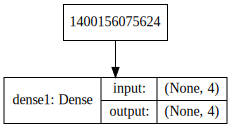

In [45]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

import os
os.environ["PATH"] += os.pathsep + 'C:/Users/creal/graphviz-2.38/release/bin'

SVG(model_to_dot(model1, show_shapes=True).create(prog='dot', format='svg'))

In [46]:
input_layer2 = Input(shape=(4,), name="input2")
hidden_layer2 = Dense(4, activation='sigmoid', weights=(w, b), name="dense2")(input_layer2)
model2 = Model(input_layer2, hidden_layer2, name="model2")
type(model2)

keras.engine.training.Model

In [47]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input2 (InputLayer)          (None, 4)                 0         
_________________________________________________________________
dense2 (Dense)               (None, 4)                 20        
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


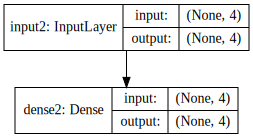

In [48]:
SVG(model_to_dot(model2, show_shapes=True).create(prog='dot', format='svg'))

In [49]:
model3 = Model(input_layer2, model1(input_layer2), name="model3")
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input2 (InputLayer)          (None, 4)                 0         
_________________________________________________________________
model1 (Sequential)          (None, 4)                 20        
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


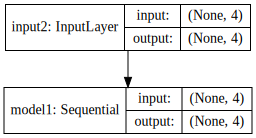

In [50]:
SVG(model_to_dot(model3, show_shapes=True).create(prog='dot', format='svg'))

In [51]:
input_layer4 = Input(shape=(4,), name="input4")
model4 = Model(input_layer4, model2(input_layer4), name="model4")
model4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input4 (InputLayer)          (None, 4)                 0         
_________________________________________________________________
model2 (Model)               (None, 4)                 20        
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


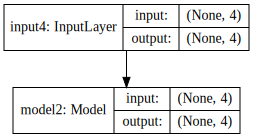

In [52]:
SVG(model_to_dot(model4, show_shapes=True).create(prog='dot', format='svg'))

In [53]:
data = np.ones((1, 4))

y = 1 / (1 + np.exp(-(w.T).dot(data.T)))
y

In [54]:
model1.predict(data)

array([[ 0.89517385,  0.49439433,  0.77874482,  0.87421381]], dtype=float32)

In [55]:
model2.predict(data)

array([[ 0.89517385,  0.49439433,  0.77874482,  0.87421381]], dtype=float32)

In [56]:
model3.predict(data)

array([[ 0.89517385,  0.49439433,  0.77874482,  0.87421381]], dtype=float32)

In [57]:
model4.predict(data)

array([[ 0.89517385,  0.49439433,  0.77874482,  0.87421381]], dtype=float32)

# Serial Model -모델 직렬화

In [58]:
input_5 = Input(shape=(4,), name="input5")
model5 = Model(input_5, model2(model1(input_5)), name="model5")

In [59]:
model5.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input5 (InputLayer)          (None, 4)                 0         
_________________________________________________________________
model1 (Sequential)          (None, 4)                 20        
_________________________________________________________________
model2 (Model)               (None, 4)                 20        
Total params: 40
Trainable params: 40
Non-trainable params: 0
_________________________________________________________________


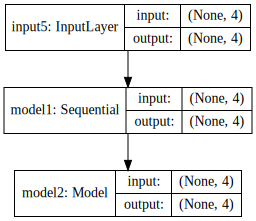

In [60]:
SVG(model_to_dot(model5, show_shapes=True).create(prog='dot', format='svg'))

In [61]:
model5.predict(data)

array([[ 0.82399994,  0.53757536,  0.71565944,  0.84259772]], dtype=float32)

In [62]:
y2 = 1 / (1 + np.exp(-(w.T).dot(y)))
y2.T

NameError: name 'y' is not defined

# Direct connect GAN
- https://datascienceschool.net/view-notebook/7788014b90364dd5ba9dc76f35b4cd7d/
- Co-evolution 이미지 생성기와 이미지 분별기가 서로 경쟁하며 트레이닝

In [63]:
from keras.datasets import mnist
from keras.layers import Input, Dense, Reshape, Flatten, Dropout
from keras.layers import BatchNormalization, Activation, ZeroPadding2D
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Sequential, Model
from keras.optimizers import Adam

### Generator

In [64]:
generator_ = Sequential()
generator_.add(Dense(128 * 7 * 7, activation="relu", input_shape=(100,)))
generator_.add(Reshape((7, 7, 128)))
generator_.add(BatchNormalization(momentum=0.8))
generator_.add(UpSampling2D())
generator_.add(Conv2D(128, kernel_size=3, padding="same"))
generator_.add(Activation("relu"))
generator_.add(BatchNormalization(momentum=0.8)) 
generator_.add(UpSampling2D())
generator_.add(Conv2D(64, kernel_size=3, padding="same"))
generator_.add(Activation("relu"))
generator_.add(BatchNormalization(momentum=0.8))
generator_.add(Conv2D(1, kernel_size=3, padding="same"))
generator_.add(Activation("tanh"))

In [65]:
noise_input = Input(shape=(100,), name="noise_input")
generator = Model(noise_input, generator_(noise_input), name="generator")

In [66]:
generator_.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6272)              633472    
_________________________________________________________________
reshape_1 (Reshape)          (None, 7, 7, 128)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 7, 7, 128)         512       
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 128)       147584    
_________________________________________________________________
activation_1 (Activation)    (None, 14, 14, 128)       0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 14, 14, 128)       512       
__________

In [67]:
generator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
noise_input (InputLayer)     (None, 100)               0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 28, 28, 1)         856705    
Total params: 856,705
Trainable params: 856,065
Non-trainable params: 640
_________________________________________________________________


In [68]:
optimizer = Adam(0.0002, 0.5)

In [69]:
generator.compile(loss='binary_crossentropy', optimizer=optimizer)

In [70]:
noise_data = np.random.normal(0, 1, (32, 100))
generated_images = 0.5 * generator.predict(noise_data) + 0.5
generated_images.shape

(32, 28, 28, 1)

In [71]:
def show_images(generated_images, n=4, m=8, figsize=(9, 5)):
    fig = plt.figure(figsize=figsize)
    plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
    for i in range(n):
        for j in range(m):
            k = i * m + j
            ax = fig.add_subplot(n, m, i * m + j + 1)
            ax.imshow(generated_images[k][:, :, 0], cmap=plt.cm.bone)
            ax.grid(False)
            ax.xaxis.set_ticks([])
            ax.yaxis.set_ticks([])
    plt.tight_layout()
    plt.show()

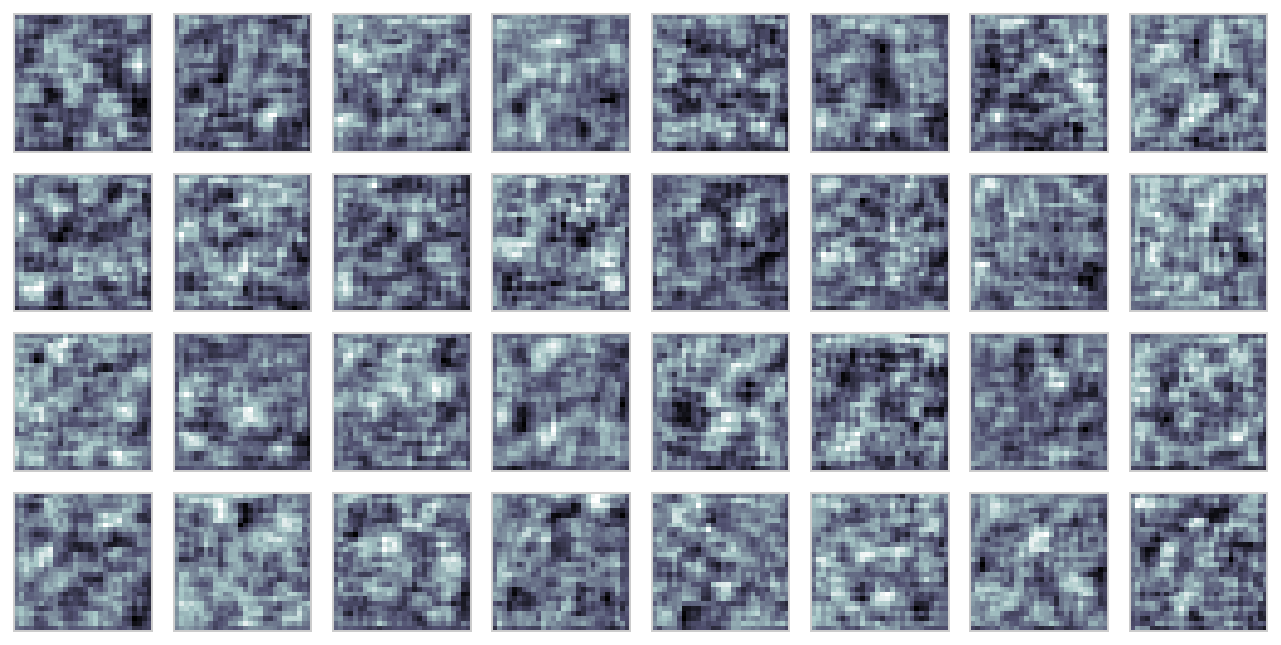

In [73]:
show_images(generated_images)
# 지금은 훈련이 안된 상태임..

### Discriminator

In [74]:
discriminator_ = Sequential()

discriminator_.add(Conv2D(32, kernel_size=3, strides=2, input_shape=(28, 28, 1), padding="same"))
discriminator_.add(LeakyReLU(alpha=0.2))
discriminator_.add(Dropout(0.25))
discriminator_.add(Conv2D(64, kernel_size=3, strides=2, padding="same"))
discriminator_.add(ZeroPadding2D(padding=((0,1),(0,1))))
discriminator_.add(LeakyReLU(alpha=0.2))
discriminator_.add(Dropout(0.25))
discriminator_.add(BatchNormalization(momentum=0.8))
discriminator_.add(Conv2D(128, kernel_size=3, strides=2, padding="same"))
discriminator_.add(LeakyReLU(alpha=0.2))
discriminator_.add(Dropout(0.25))
discriminator_.add(BatchNormalization(momentum=0.8))
discriminator_.add(Conv2D(256, kernel_size=3, strides=1, padding="same"))
discriminator_.add(LeakyReLU(alpha=0.2))
discriminator_.add(Dropout(0.25))
discriminator_.add(Flatten())
discriminator_.add(Dense(1, activation='sigmoid'))

image_input = Input(shape=(28, 28, 1), name="image_input")

discriminator = Model(image_input, discriminator_(image_input), name="discriminator")


In [75]:
discriminator.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [76]:
discriminator_.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 14, 14, 32)        320       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 8, 8, 64)          0         
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 8, 8, 64)          0         
__________

In [77]:
discriminator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
image_input (InputLayer)     (None, 28, 28, 1)         0         
_________________________________________________________________
sequential_2 (Sequential)    (None, 1)                 392705    
Total params: 392,705
Trainable params: 392,321
Non-trainable params: 384
_________________________________________________________________


### Combined Model

In [78]:
noise_input2 = Input(shape=(100,), name="noise_input2")
combined = Model(noise_input2, discriminator(generator(noise_input2)))

In [79]:
combined.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
noise_input2 (InputLayer)    (None, 100)               0         
_________________________________________________________________
generator (Model)            (None, 28, 28, 1)         856705    
_________________________________________________________________
discriminator (Model)        (None, 1)                 392705    
Total params: 1,249,410
Trainable params: 1,248,386
Non-trainable params: 1,024
_________________________________________________________________


In [80]:
combined.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [81]:
(X_train, _), (_, _) = mnist.load_data()

# Rescale -1 to 1
X_train = (X_train.astype(np.float32) - 127.5) / 127.5
X_train = np.expand_dims(X_train, axis=3)

### training

In [82]:
batch_size = 128
half_batch = int(batch_size / 2)

In [83]:
def train(epochs, print_step=10):
    history = []
    for epoch in range(epochs):

        # discriminator 트레이닝 단계
        #######################################################################3
        
        # 데이터 절반은 실제 이미지, 절반은 generator가 생성한 가짜 이미지
        real_images = X_train[np.random.randint(0, X_train.shape[0], half_batch)]
        y_real = np.ones((half_batch, 1))
        generated_images = generator.predict(np.random.normal(0, 1, (half_batch, 100)))
        y_generated = np.zeros((half_batch, 1))
        
        # discriminator가 실제 이미지와 가짜 이미지를 구별하도록 discriminator를 트레이닝
        discriminator.trainable = True
        d_loss_real = discriminator.train_on_batch(real_images, y_real)
        d_loss_fake = discriminator.train_on_batch(generated_images, y_generated)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # generator 트레이닝 단계
        #######################################################################3
        
        # 전부 generator가 생성한 가짜 이미지를 사용. 
        # discriminator가 구별하지 못하도록 generator를 트레이닝
        noise = np.random.normal(0, 1, (batch_size, 100))
        discriminator.trainable = False
        g_loss = combined.train_on_batch(noise, np.ones((batch_size, 1)))

        # 기록
        record = (epoch, d_loss[0], 100 * d_loss[1], g_loss[0], 100 * g_loss[1])
        history.append(record)
        if epoch % print_step == 0:
            print("%5d [D loss: %.3f, acc.: %.2f%%] [G loss: %.3f, acc.: %.2f%%]" % record)


In [84]:
%%time
history100 = train(100)

C:\Users\creal\Anaconda3\lib\site-packages\keras\engine\training.py:478: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


    0 [D loss: 0.949, acc.: 34.38%] [G loss: 0.791, acc.: 45.31%]
   10 [D loss: 1.062, acc.: 51.56%] [G loss: 0.390, acc.: 91.41%]
   20 [D loss: 1.188, acc.: 50.00%] [G loss: 0.361, acc.: 91.41%]
   30 [D loss: 1.334, acc.: 50.00%] [G loss: 0.408, acc.: 86.72%]
   40 [D loss: 1.579, acc.: 50.00%] [G loss: 0.412, acc.: 89.06%]
   50 [D loss: 1.694, acc.: 50.00%] [G loss: 0.362, acc.: 96.88%]
   60 [D loss: 1.713, acc.: 50.00%] [G loss: 0.355, acc.: 95.31%]
   70 [D loss: 1.650, acc.: 50.00%] [G loss: 0.346, acc.: 96.09%]
   80 [D loss: 1.677, acc.: 50.00%] [G loss: 0.375, acc.: 94.53%]
   90 [D loss: 1.592, acc.: 50.00%] [G loss: 0.387, acc.: 97.66%]
Wall time: 19min 6s


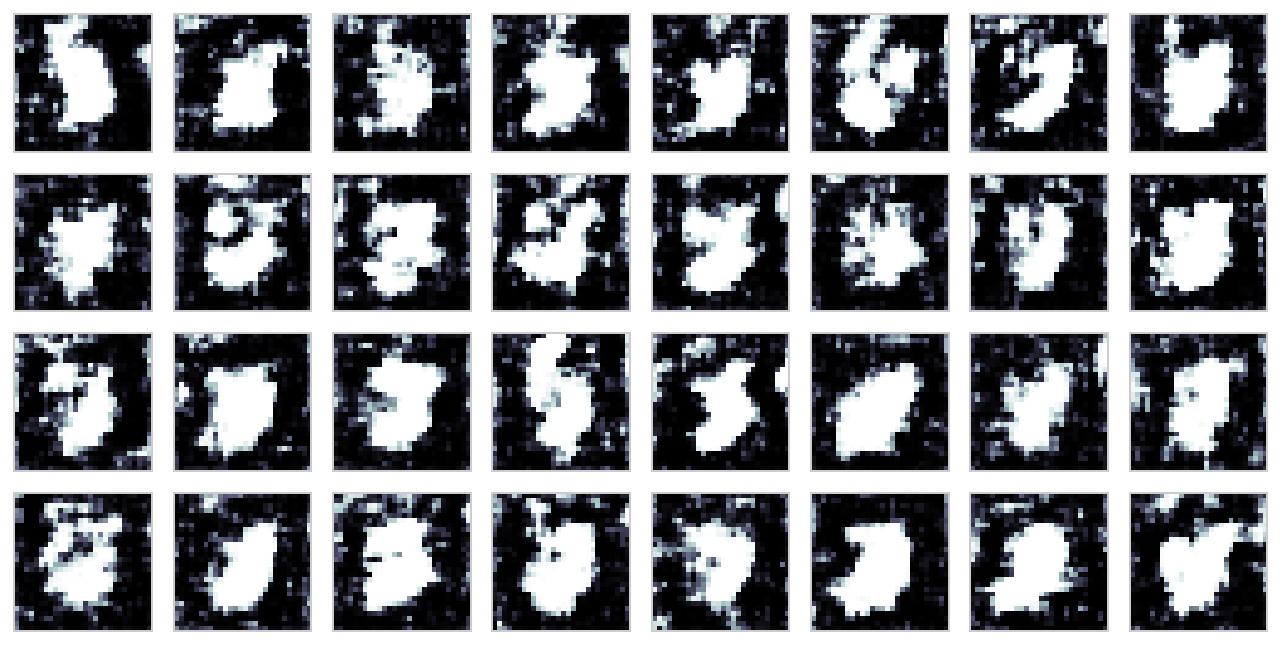

In [85]:
show_images(0.5 * generator.predict(noise_data) + 0.5)

In [ ]:
from keras.models import load_model

def save_models(epoch):
    generator.save("dcgan_generator_{}.hdf5".format(epoch))
    discriminator.save("dcgan_discriminator_{}.hdf5".format(epoch))
    combined.save("dcgan_combined_{}.hdf5".format(epoch))

In [ ]:
%%time
history1000 = train(1000, 100)

In [ ]:
show_images(0.5 * generator.predict(noise_data) + 0.5)